In [2]:
from dotenv import load_dotenv
import os

In [3]:
load_dotenv("../.env")

True

In [4]:
api_key = os.getenv("ALPHA_VANTAGE_API_KEY")

## Intraday Stock Market Data API

In [5]:
function = "TIME_SERIES_INTRADAY"
symbol = "MSFT"
interval = "5min"
datatype = "csv"
outputsize = "full"

In [6]:
from datetime import datetime

current_year = datetime.now().year

In [16]:
import requests

for i in [current_year - 2, current_year - 1, current_year]:
    for j in range(1, 13):
        period = f"{i}-{j:02d}"
        endpoint = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}&datatype={datatype}&month={period}"
        r = requests.get(url=endpoint)

        if not os.path.exists(f"../data/{i}/{j:02d}"):
            os.makedirs(f"../data/{i}/{j:02d}")
            
        with open(f"../data/{i}/{j:02d}/{symbol}_{interval}.csv", "w") as f:
            f.write(r.text)


## News & Sentiments API

In [11]:
import requests

function = "NEWS_SENTIMENT"
tickers = "MSFT"
time_from = "20230101T0400"
time_to = "20250115T1955"
limit=1000

endpoint = f"https://www.alphavantage.co/query?function={function}&tickers={tickers}&apikey={api_key}&time_from={time_from}&time_to={time_to}&limit={limit}"

r = requests.get(url=endpoint)

In [12]:
r.json()

{'items': '685',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': 'Is Amazon the More Resilient Pick Over NVDA Stock in the AI Revolution?',
   'url': 'https://www.zacks.com/stock/news/2397737/is-amazon-the-more-resilient-pick-over-nvda-stock-in-the-ai-revolution',
   'time_published': '20250115T194500',
   'authors': ['Nilanjan Banerjee'],
   'summary': "Amazon's diversified business makes it a more stable pick than NVIDIA, which relies heavily on AI.",
   'banner_image': 'https://staticx-tuner.zacks.com/images/articles/main/f3/74235.jpg',
   'source': 'Zacks Commentary',
   'category_within_source': 'n/a',
   'source_domain': 'www.zacks.com',
   'topics': [{'topic': 'Retail & Wholesale', 'relevance_score': '0.333333'},
    {'topic': 'Financial Mar

In [13]:
if not os.path.exists(f"../data/news"):
    os.makedirs(f"../data/news")

with open(f"../data/news/{tickers}.json", "w") as f:
    f.write(r.text)

In [17]:
from datetime import datetime
import json

for feed in r.json()["feed"]:
    date = datetime.strptime(feed["time_published"], "%Y%m%dT%H%M%S")
    year = date.year
    month = date.month

    if not os.path.exists(f"../data/news/{year}/{month:02d}"):
        os.makedirs(f"../data/news/{year}/{month:02d}")

    with open(f"../data/news/{year}/{month:02d}/MSFT_news_{date.hour}-{date.minute}.json", "w") as f:
        f.write(json.dumps(feed, ensure_ascii=False, indent=4))

## Feature Engineering

In [7]:
import pandas as pd
import glob

In [8]:
csv_files = glob.glob("../data/*/*/MSFT_5min.csv")

In [9]:
csv_files

['../data\\2023\\01\\MSFT_5min.csv',
 '../data\\2023\\02\\MSFT_5min.csv',
 '../data\\2023\\03\\MSFT_5min.csv',
 '../data\\2023\\04\\MSFT_5min.csv',
 '../data\\2023\\05\\MSFT_5min.csv',
 '../data\\2023\\06\\MSFT_5min.csv',
 '../data\\2023\\07\\MSFT_5min.csv',
 '../data\\2023\\08\\MSFT_5min.csv',
 '../data\\2023\\09\\MSFT_5min.csv',
 '../data\\2023\\10\\MSFT_5min.csv',
 '../data\\2023\\11\\MSFT_5min.csv',
 '../data\\2023\\12\\MSFT_5min.csv',
 '../data\\2024\\01\\MSFT_5min.csv',
 '../data\\2024\\02\\MSFT_5min.csv',
 '../data\\2024\\03\\MSFT_5min.csv',
 '../data\\2024\\04\\MSFT_5min.csv',
 '../data\\2024\\05\\MSFT_5min.csv',
 '../data\\2024\\06\\MSFT_5min.csv',
 '../data\\2024\\07\\MSFT_5min.csv',
 '../data\\2024\\08\\MSFT_5min.csv',
 '../data\\2024\\09\\MSFT_5min.csv',
 '../data\\2024\\10\\MSFT_5min.csv',
 '../data\\2024\\11\\MSFT_5min.csv',
 '../data\\2024\\12\\MSFT_5min.csv',
 '../data\\2025\\01\\MSFT_5min.csv']

In [10]:
df = pd.concat([pd.read_csv(file, parse_dates=["timestamp"]) for file in csv_files], ignore_index=True)
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

In [11]:
df.head()

,timestamp,open,high,low,close,volume
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737


In [12]:
df

,timestamp,open,high,low,close,volume
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737
...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500


In [13]:
df['sma_3'] = df['close'].rolling(window=3).mean()

In [14]:
df

,timestamp,open,high,low,close,volume,sma_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433
...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333


In [15]:
df['ema_3'] = df['close'].ewm(span=3, adjust=False).mean()

In [16]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019
...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678


In [17]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['rsi_14'] = calculate_rsi(df['close'], period= 14)

In [18]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN
...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484


In [19]:
df['price_change'] = df['close'].pct_change()

In [20]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370
...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351


In [21]:
df['volatility_3'] = df['close'].rolling(window=3).std()

In [22]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024
...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865


In [23]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [24]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN,4,1
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN,4,1
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064,4,1
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694,4,1
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2


In [25]:
for lag in range(1, 4):
    df[f'close_lag_{lag}'] = df['close'].shift(lag)

In [26]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week,close_lag_1,close_lag_2,close_lag_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN,4,1,NaN,NaN,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN,4,1,238.8933,NaN,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064,4,1,238.5982,238.8933,NaN
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694,4,1,238.9720,238.5982,238.8933
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024,4,1,239.3754,238.9720,238.5982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2,427.0300,427.4000,427.2250
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2,426.9200,427.0300,427.4000
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2,427.1100,426.9200,427.0300
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2,427.1000,427.1100,426.9200


In [27]:
df['trend'] = (df['close'].shift(-1) > df['close']).astype(int)

In [28]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week,close_lag_1,close_lag_2,close_lag_3,trend
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN,4,1,NaN,NaN,NaN,0
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN,4,1,238.8933,NaN,NaN,1
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064,4,1,238.5982,238.8933,NaN,1
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694,4,1,238.9720,238.5982,238.8933,0
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024,4,1,239.3754,238.9720,238.5982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2,427.0300,427.4000,427.2250,1
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2,426.9200,427.0300,427.4000,0
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2,427.1100,426.9200,427.0300,1
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2,427.1000,427.1100,426.9200,1


In [29]:
df.trend.value_counts()

trend
0    48820
1    47249
Name: count, dtype: int64

In [30]:
df = df.dropna()

In [31]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week,close_lag_1,close_lag_2,close_lag_3,trend
13,2023-01-03 05:15:00,239.0212,239.0212,239.0212,239.0212,157,239.355767,239.264573,52.329605,-0.001644,0.309304,5,1,239.4148,239.6313,239.6214,0
14,2023-01-03 05:25:00,238.7457,238.7457,238.7457,238.7457,193,239.060567,239.005137,47.556777,-0.001153,0.336283,5,1,239.0212,239.4148,239.6313,1
15,2023-01-03 05:35:00,238.7359,238.8638,238.7359,238.8638,617,238.876900,238.934468,54.670136,0.000495,0.138216,5,1,238.7457,239.0212,239.4148,1
16,2023-01-03 05:40:00,238.9130,238.9130,238.9130,238.9130,100,238.840833,238.923734,48.828900,0.000206,0.085982,5,1,238.8638,238.7457,239.0212,1
17,2023-01-03 05:45:00,239.0409,239.0409,239.0409,239.0409,100,238.939233,238.982317,42.545130,0.000535,0.091418,5,1,238.9130,238.8638,238.7457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2,427.0300,427.4000,427.2250,1
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2,426.9200,427.0300,427.4000,0
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2,427.1100,426.9200,427.0300,1
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2,427.1000,427.1100,426.9200,1


## Data Exploration

<Axes: title={'center': 'MSFT Close Price'}, xlabel='Date', ylabel='Close Price'>

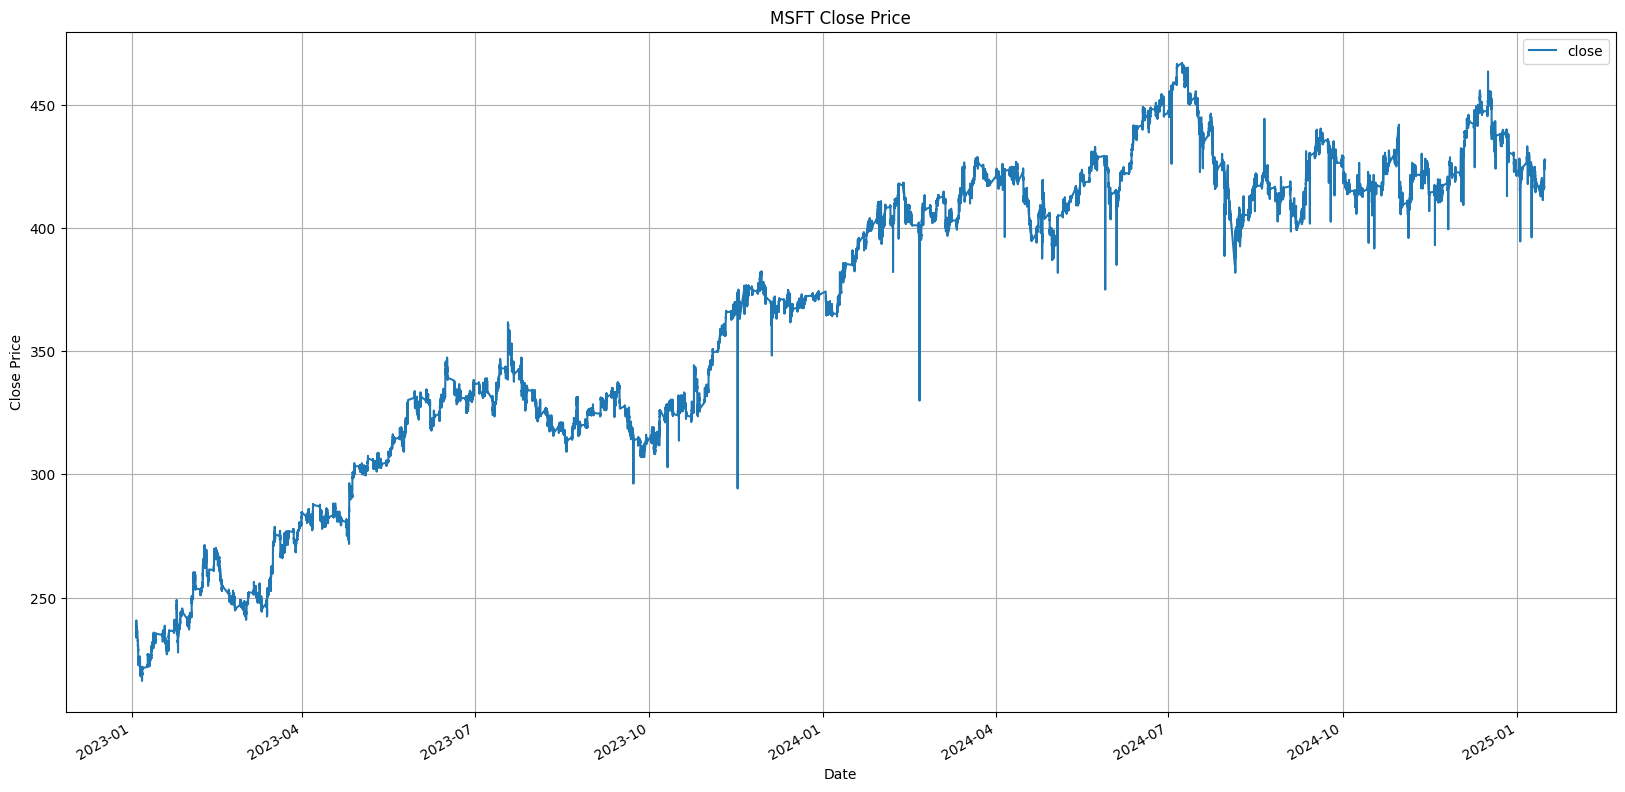

In [ ]:
df.plot(x='timestamp', 
        y='close',
        xlabel='Date',
        ylabel='Close Price',
        title='MSFT Close Price',
        grid=True,
        kind='line',
        figsize=(20, 10))

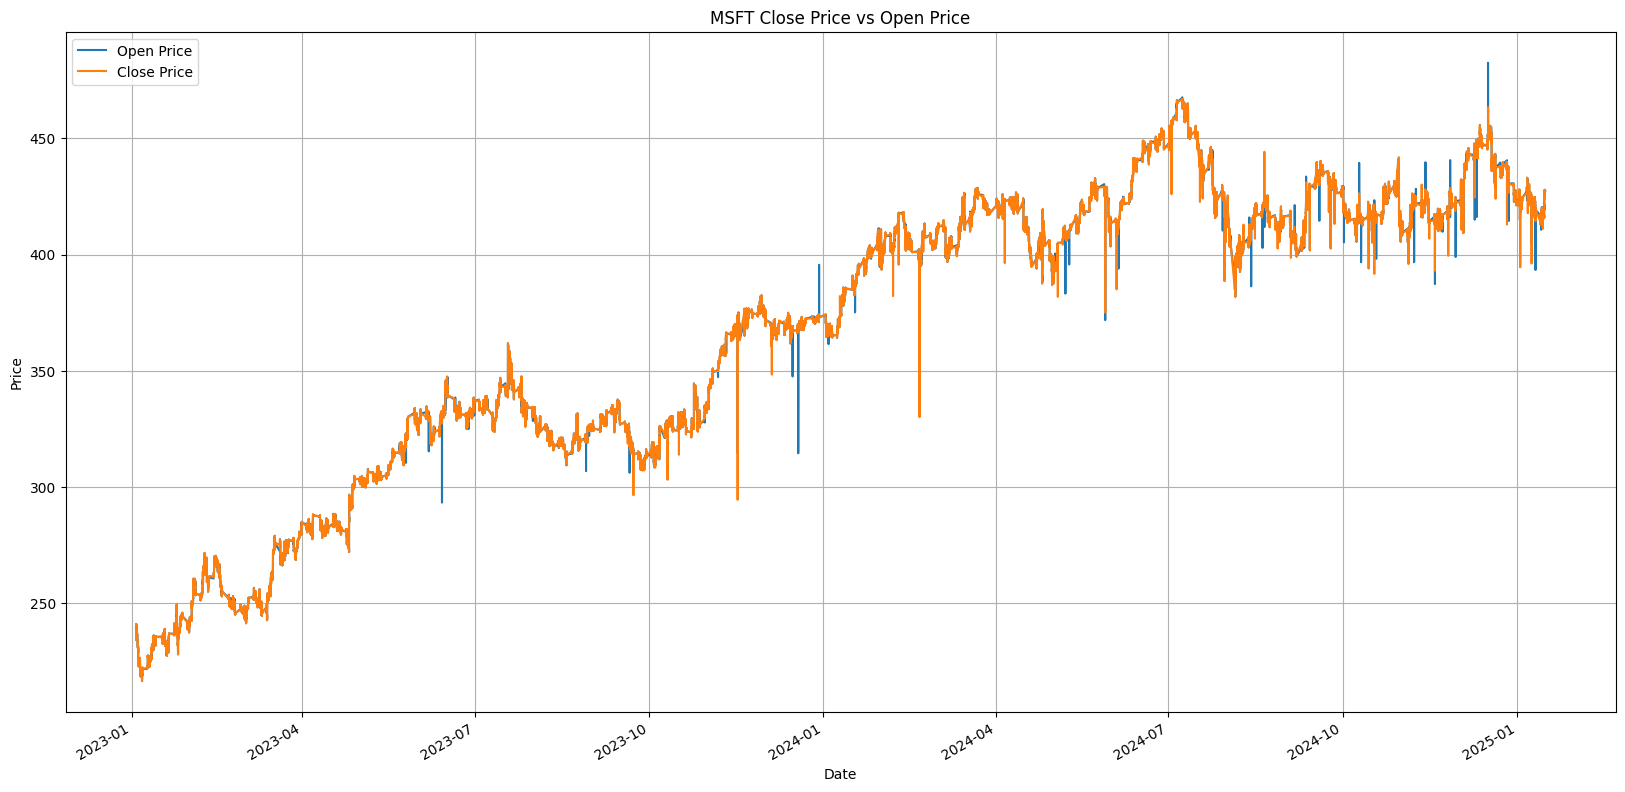

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
df.plot(x='timestamp',
        y=['open', 'close'],
        xlabel='Date',
        ylabel='Price',
        title='MSFT Close Price vs Open Price',
        grid=True,
        kind='line',
        figsize=(20, 10),
        ax=ax
    )
ax.legend(["Open Price", "Close Price"])

<Axes: title={'center': 'MSFT Volume'}, xlabel='Date', ylabel='Volume'>

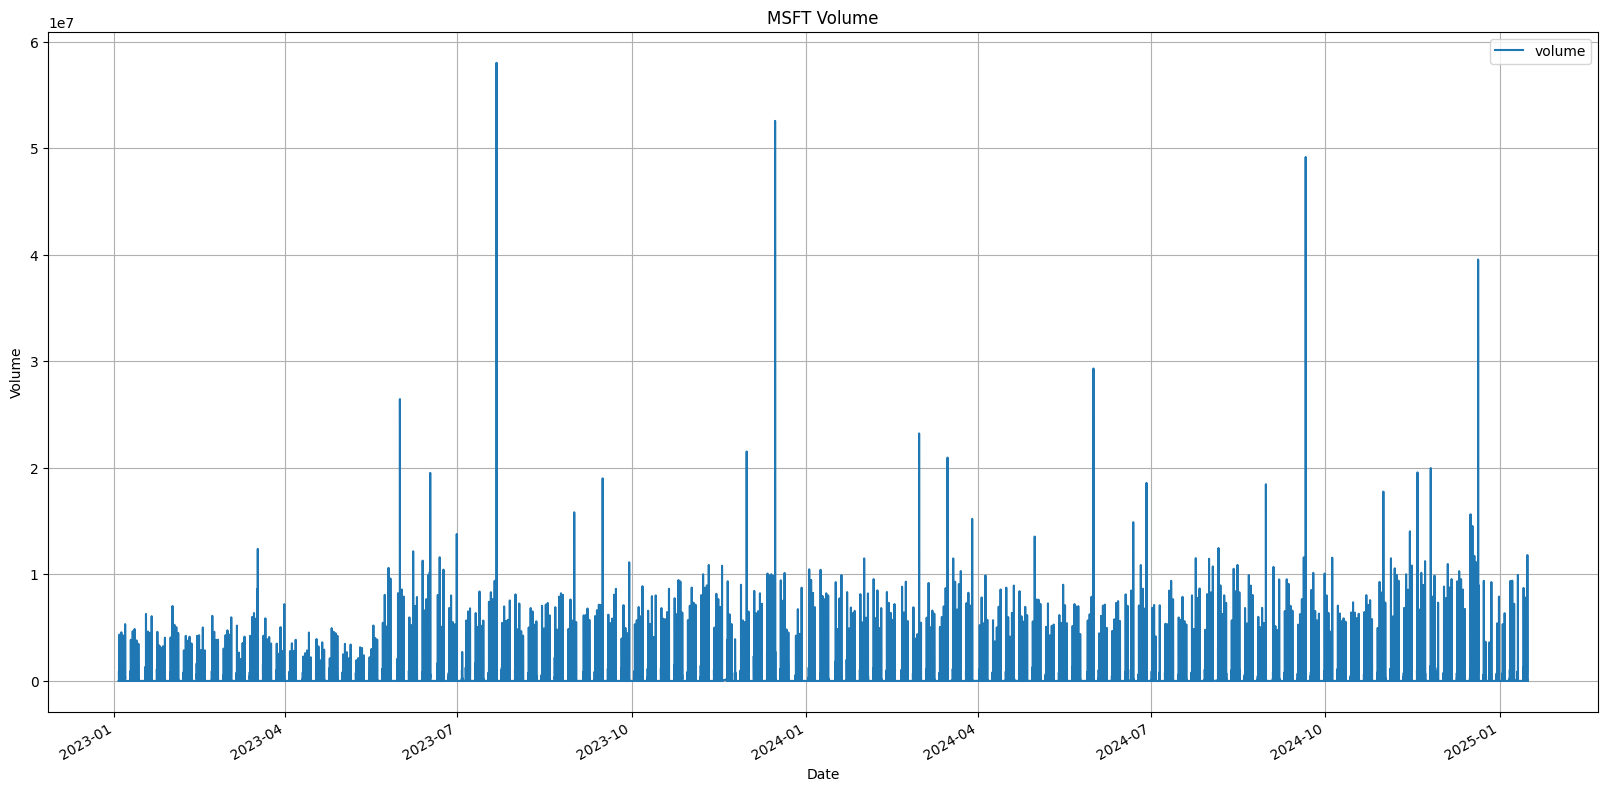

In [56]:
df.plot(x='timestamp',
        y='volume',
        xlabel='Date',
        ylabel='Volume',
        title='MSFT Volume',
        grid=True,
        kind='line',
        figsize=(20, 10)
    )

<Axes: title={'center': 'MSFT Volatility'}, xlabel='Date', ylabel='Volatility'>

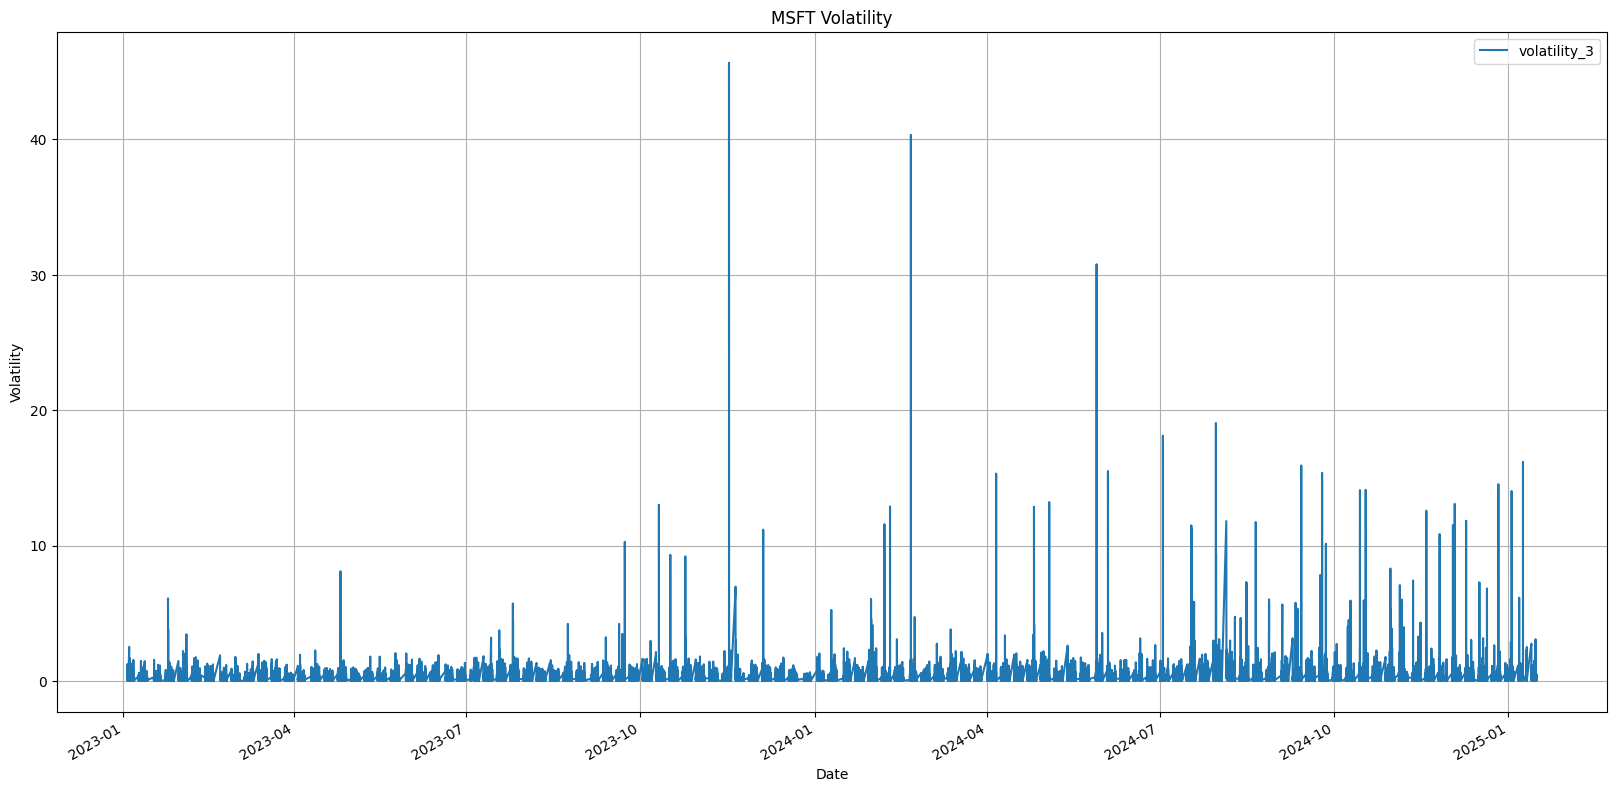

In [58]:
df.plot(x='timestamp',
        y='volatility_3',
        xlabel='Date',
        ylabel='Volatility',
        title='MSFT Volatility',
        grid=True,
        kind='line',
        figsize=(20, 10)
)

## Model Training

In [32]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [33]:
class TrendClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(TrendClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1) # Single output
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = TrendClassifier(input_size=10, hidden_size=64, num_classes=2)